In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_46/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
nltk=3.5 already installed
unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<img src='../../../common/logo_DH.png' align='left' width=35%/>

# Preprocesamiento en Text Mining.

En esta práctiva vamos a usar el dataset de mails que ya usamos en la clase de Naive Bayes.

Este dataset (<a href="https://www.kaggle.com/riyadhrazzaq/multinomial-naive-bayes-from-scratch/data?select=spam.csv" traget="_blank">fuente</a>) tiene dos columnas:

* una columna con el cuerpo del mail, 

* y otra con la etiqueta spam / ham según corresponda a un mail que es spam o no respectivamente.

Vamos a 
* preprocesar los textos de los mails usando `CountVectorizer` y `TfidfTransformer`
* usar Singular Value Decomposition para obtener una representación en dos dimensiones de cada mail, 
* y contruir nubes de palabras para visualizar que palabras caracterizan a cada una de la etiquetas (spam / ham).


## Imports

In [3]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

Si el import de `WordCloud` da error, pueden instalarla descomentando esta linea:

In [4]:
#! conda install -c conda-forge wordcloud=1.8.1 --yes --name dhdsblend2021

## Ejercicio 1

Leer los datos del archivo `spam.csv`. 

Mantener sólo las columnas 1 y 2 etiquetarlas como 'target' y 'text'

Ayuda: usar `encoding='iso8859_14'`

In [7]:
df = pd.read_csv('../Data/spam.csv', encoding='iso8859_14')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
df = df[['v1','v2']]
df.columns = ['target', 'text']

## Ejercicio 2

Los textos del dataset están en idioma inglés.

Construir una lista de stems de stopwords usando `SnowballStemmer`

Generar una instancia de DataFrame resultado de aplicar CountVectorizer a los textos de los mails, usando como stopwords la lista resultado del paso anterior.

A partir del encoding resultado de CountVectorizer, generar una instancia de DataFrame resultado de aplicar TfidfTransformer.

In [41]:
snowball=SnowballStemmer("english")

stopwords_en=stopwords.words('english')

snowball_stemmer=[snowball.stem(stopwords_en[i]) for i in range(len(stopwords_en))]


In [53]:
vectorizer=CountVectorizer(lowercase=True, stop_words=snowball_stemmer, strip_accents = 'unicode')


In [55]:
vectorizer_encoding=vectorizer.fit_transform(df.text)

In [57]:
countV_df = pd.DataFrame(vectorizer_encoding.todense(), columns = vectorizer.get_feature_names())

countV_df.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
tfidf=TfidfTransformer()

vectorizer_encoding_tfidf=tfidf.fit_transform(vectorizer_encoding)

In [63]:
pd.DataFrame(vectorizer_encoding_tfidf.todense(),columns=vectorizer.get_feature_names())

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Ejercicio 3

Representar en un scatterplot las dos componenetes más importantes que resultan de Singular Value Decomposition de la representación tf-idf, coloreando los puntos de acuerdo a su etiqueta.

In [69]:
SVD=TruncatedSVD(n_components=2)

data_components=SVD.fit_transform(vectorizer_encoding_tfidf)
data_components

array([[ 0.05135981,  0.01768523],
       [ 0.14170181,  0.21516938],
       [ 0.03450343, -0.00864401],
       ...,
       [ 0.01496843,  0.00168932],
       [ 0.05179748,  0.00156502],
       [ 0.03937158,  0.01611965]])

<AxesSubplot:xlabel='0', ylabel='1'>

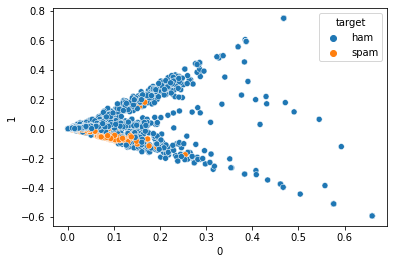

In [72]:
%matplotlib inline
data_components_df = pd.DataFrame(data_components)

sns.scatterplot(x = data_components_df.iloc[:, 0], y = data_components_df.iloc[:, 1], hue = df.target)

## Ejercicio 4

Representar en un scatterplot las dos componenetes más importantes que resultan de Singular Value Decomposition de la representación CountVectorizer, coloreando los puntos de acuerdo a su etiqueta.

¿Cuál de las dos (ej 3 vs ej 4) les resulta más informativa?

¿Creen que algún algoritmo de clustering agruparía adecuadamente los tipos de email? ¿Por qué?

In [74]:
SVD=TruncatedSVD(n_components=2)

data_components_cv=SVD.fit_transform(vectorizer_encoding)
data_components_cv

array([[ 0.14435928, -0.34585628],
       [ 0.02357582, -0.07966638],
       [ 0.13777436, -0.82437249],
       ...,
       [ 0.0241917 , -0.06012143],
       [ 0.14970518, -0.52664372],
       [ 0.13081644, -0.11263358]])

In [75]:
data_components_cv_df = pd.DataFrame(data_components_cv)

<AxesSubplot:xlabel='0', ylabel='1'>

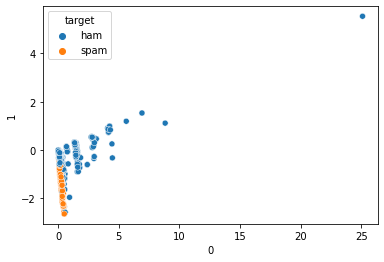

In [76]:
sns.scatterplot(x = data_components_cv_df.iloc[:, 0], y = data_components_cv_df.iloc[:, 1], hue = df.target)

## Ejercicio 5

Usando este <a href="https://www.python-graph-gallery.com/wordcloud/" target="_blank">tutorial</a> o este  <a href="https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5" target="_blank">otro</a> generen las nubes de palabras para 

* los registros de etiqueta spam
* los registros de etiqueta ham

¿El resultado concuerda con la intuición que tienen sobre los textos de mails spam?

In [94]:
mask_spam = df.target == 'spam'
data_spam = df.loc[mask_spam, :]
text_spam = ' '.join(data_spam.text)

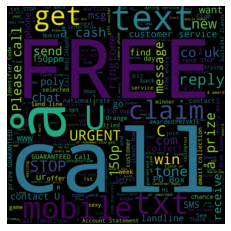

In [96]:
# Create the wordcloud object
wordcloud = WordCloud(width=1500, height=1500, margin=0,random_state=1, stopwords = stopwords_en).generate(text_spam)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()